# 1. Dataset Preparation

In [34]:
import numpy as np #For numerical operations and multidimensional arrays.
import pandas as pd #for cover in format data table using DataFrame
import seaborn as sns
import string #to export numbers to letters
import matplotlib.pyplot as plt
from skimage.feature import hog
from tqdm import tqdm  # used by progress bar when traversing the loop
from skimage import exposure
from sklearn.utils import shuffle
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix


In [35]:
# Load dataset EMNIST Letters
df_letter_test = pd.read_csv("emnist-letters-test.csv", header=None)
df_letter_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14796,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14797,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14798,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Load dataset EMNIST Letters
df_letter = pd.read_csv("emnist-letters-train.csv", header=None)
df_letter

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88795,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88798,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_letter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88800 entries, 0 to 88799
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 531.8 MB


In [38]:
# 3. Ambil 100 sample dari masing-masing kelas (1 sampai 26, karena EMNIST Letters mulai dari 1)
balanced_data = []

for i in range(1, 27):
    class_i = df_letter[df_letter[0] == i].sample(100, random_state=42)
    balanced_data.append(class_i)
    print(f"Kelas {i} ({chr(i + 64)}): {len(class_i)} sampel diambil")

balanced_df = pd.concat(balanced_data)
print(f"\nTotal dataset: {len(balanced_df)} sampel dari {len(balanced_df[0].unique())} kelas")

Kelas 1 (A): 100 sampel diambil
Kelas 2 (B): 100 sampel diambil
Kelas 3 (C): 100 sampel diambil
Kelas 4 (D): 100 sampel diambil
Kelas 5 (E): 100 sampel diambil
Kelas 6 (F): 100 sampel diambil
Kelas 7 (G): 100 sampel diambil
Kelas 8 (H): 100 sampel diambil
Kelas 9 (I): 100 sampel diambil
Kelas 10 (J): 100 sampel diambil
Kelas 11 (K): 100 sampel diambil
Kelas 12 (L): 100 sampel diambil
Kelas 13 (M): 100 sampel diambil
Kelas 14 (N): 100 sampel diambil
Kelas 15 (O): 100 sampel diambil
Kelas 16 (P): 100 sampel diambil
Kelas 17 (Q): 100 sampel diambil
Kelas 18 (R): 100 sampel diambil
Kelas 19 (S): 100 sampel diambil
Kelas 20 (T): 100 sampel diambil
Kelas 21 (U): 100 sampel diambil
Kelas 22 (V): 100 sampel diambil
Kelas 23 (W): 100 sampel diambil
Kelas 24 (X): 100 sampel diambil
Kelas 25 (Y): 100 sampel diambil
Kelas 26 (Z): 100 sampel diambil

Total dataset: 2600 sampel dari 26 kelas


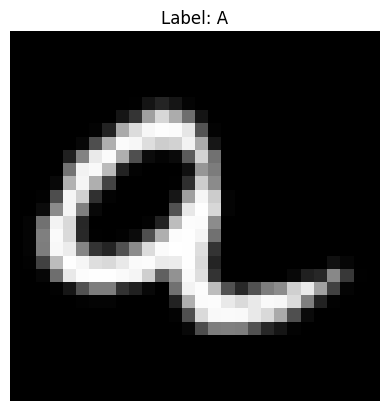

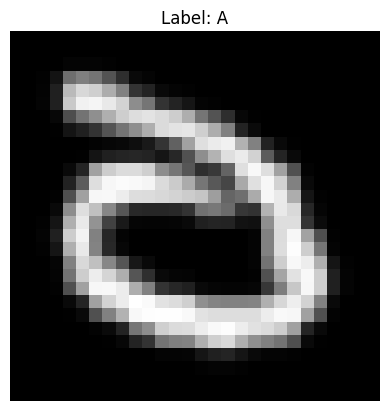

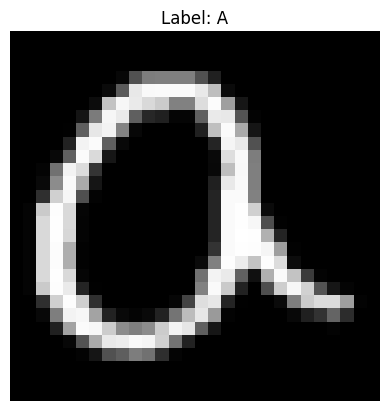

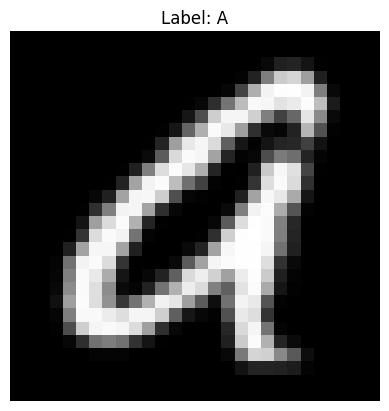

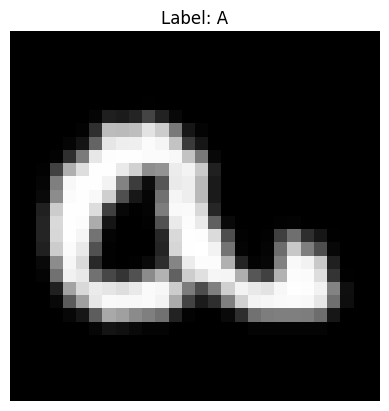

In [39]:
# Fungsi untuk menampilkan gambar
def show_emnist_image(row):
    label = row[0]
    image = np.array(row[1:], dtype=np.uint8).reshape(28, 28).T  # Transpose untuk orientasi benar
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {chr(label + 64)}")
    plt.axis('off')
    plt.show()

# Contoh: tampilkan 1 gambar pertama dari dataset seimbang
for i in range(5):
    show_emnist_image(balanced_df.iloc[i])

In [40]:
# 4. Shuffle dataset
balanced_df = shuffle(balanced_df, random_state=42).reset_index(drop=True)
balanced_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2596,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2597,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2598,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Separate between fitur and label
X = balanced_df.drop(columns=[0])  # Fitur (piksel gambar)
y = balanced_df[0]                 # Label (huruf: 1-26)

print("Fitur (X):")
print(X.head())
print(f"Bentuk X: {X.shape}\n")

print("Label (y):")
print(y.head())
print(f"Bentuk y: {y.shape}")

Fitur (X):
   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 784 columns]
Bentuk X: (2600, 784)

Label (y):
0    16
1     2
2     3
3    22
4    16
Name: 0, dtype: int64
Bentuk y: (2600,)


In [42]:
# Split 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # used stratify so that the proportion of each class is balanced
)

print("Jumlah data train :", len(X_train))
print("Jumlah data test  :", len(X_test))

Jumlah data train : 2080
Jumlah data test  : 520


In [43]:
# Tampilkan label sebagai huruf
print("\nLabel (y_train) sebagai huruf:")
print(y_train.apply(lambda x: chr(x + 64)).head()) #convert label number to letters

print("\nLabel (y_test) sebagai huruf:")
print(y_test.apply(lambda x: chr(x + 64)).head())


Label (y_train) sebagai huruf:
26      U
2075    S
2082    P
1047    W
1734    I
Name: 0, dtype: object

Label (y_test) sebagai huruf:
1186    E
2583    Y
1890    S
337     W
1653    T
Name: 0, dtype: object


#### Leave-One-Out Cross Validation (LOOCV) is an extreme cross validation method where:
- Out of n data, n-1 is used for training and 1 is used for testing.
- This process is repeated n times, so that each data has been the test data once.


In [49]:
# Inisialisasi LOOCV to devide data
loo = LeaveOneOut()
clf = SVC(kernel='linear') #SVM with kernel linear

accuracies = [] # for keep accuracy data from each iteration

for LOOCV testing I only use the first 100 data only

In [50]:
# Mengambil 100 data pertama untuk uji LOOCV
X_loocv = X_train[:100]
y_loocv = y_train[:100]

In [51]:
# SHow label content
print("Label huruf (y_loocv):")
print([chr(label + 64) for label in y_loocv])

# show class distribution summary
print("\nDistribusi kelas dalam 100 data pertama:")
for label in sorted(set(y_loocv)):
    count = (y_loocv == label).sum()
    print(f"Kelas {label} ({chr(label + 64)}): {count} sampel")

Label huruf (y_loocv):
['U', 'S', 'P', 'W', 'I', 'I', 'U', 'R', 'F', 'S', 'I', 'T', 'I', 'O', 'Q', 'D', 'Y', 'V', 'C', 'N', 'Y', 'P', 'K', 'Z', 'A', 'B', 'A', 'R', 'V', 'Z', 'Z', 'C', 'E', 'V', 'A', 'W', 'X', 'D', 'N', 'N', 'F', 'A', 'B', 'P', 'N', 'F', 'Z', 'T', 'E', 'D', 'Q', 'R', 'O', 'J', 'M', 'Z', 'N', 'C', 'E', 'I', 'Q', 'K', 'M', 'W', 'F', 'G', 'A', 'F', 'X', 'V', 'B', 'Q', 'T', 'G', 'V', 'U', 'F', 'J', 'O', 'A', 'I', 'Z', 'V', 'G', 'E', 'S', 'S', 'J', 'S', 'C', 'I', 'D', 'D', 'T', 'H', 'Q', 'U', 'F', 'O', 'O']

Distribusi kelas dalam 100 data pertama:
Kelas 1 (A): 6 sampel
Kelas 2 (B): 3 sampel
Kelas 3 (C): 4 sampel
Kelas 4 (D): 5 sampel
Kelas 5 (E): 4 sampel
Kelas 6 (F): 7 sampel
Kelas 7 (G): 3 sampel
Kelas 8 (H): 1 sampel
Kelas 9 (I): 7 sampel
Kelas 10 (J): 3 sampel
Kelas 11 (K): 2 sampel
Kelas 13 (M): 2 sampel
Kelas 14 (N): 5 sampel
Kelas 15 (O): 5 sampel
Kelas 16 (P): 3 sampel
Kelas 17 (Q): 5 sampel
Kelas 18 (R): 3 sampel
Kelas 19 (S): 5 sampel
Kelas 20 (T): 4 sampel
Kelas 

the 100 data were taken in order from the randomized data.

In [52]:
print("Memulai Leave-One-Out Cross Validation (LOOCV)...")
print(f"Total iterasi (jumlah data uji): {len(X_loocv)}")

Memulai Leave-One-Out Cross Validation (LOOCV)...
Total iterasi (jumlah data uji): 100


In [53]:
#jalankan LOOCV
for i, (train_index, test_index) in enumerate(tqdm(loo.split(X_loocv)), start=1):
    X_train_loo, X_test_loo = X_loocv.iloc[train_index], X_loocv.iloc[test_index]
    y_train_loo, y_test_loo = y_loocv.iloc[train_index], y_loocv.iloc[test_index]

    clf.fit(X_train_loo, y_train_loo)
    y_pred_loo = clf.predict(X_test_loo)

    acc = accuracy_score(y_test_loo, y_pred_loo)
    accuracies.append(acc)

    if i % 10 == 0 or i == 1:
        print(f"Iterasi ke-{i:3d}: Prediksi = {y_pred_loo[0]}, Label Sebenarnya = {y_test_loo.values[0]}, Akurasi Sementara = {np.mean(accuracies)*100:.2f}%")

# Hasil akhir
average_accuracy = np.mean(accuracies)
print("\nLOOCV selesai.")
print(f"Akurasi rata-rata dari 100 iterasi: {average_accuracy * 100:.2f}%")

21it [00:00, 101.02it/s]

Iterasi ke-  1: Prediksi = 17, Label Sebenarnya = 21, Akurasi Sementara = 0.00%
Iterasi ke- 10: Prediksi = 19, Label Sebenarnya = 19, Akurasi Sementara = 60.00%
Iterasi ke- 20: Prediksi = 14, Label Sebenarnya = 14, Akurasi Sementara = 50.00%


43it [00:00, 98.65it/s] 

Iterasi ke- 30: Prediksi = 26, Label Sebenarnya = 26, Akurasi Sementara = 40.00%
Iterasi ke- 40: Prediksi = 13, Label Sebenarnya = 14, Akurasi Sementara = 45.00%
Iterasi ke- 50: Prediksi = 9, Label Sebenarnya = 4, Akurasi Sementara = 42.00%


75it [00:00, 101.20it/s]

Iterasi ke- 60: Prediksi = 9, Label Sebenarnya = 9, Akurasi Sementara = 40.00%
Iterasi ke- 70: Prediksi = 22, Label Sebenarnya = 22, Akurasi Sementara = 40.00%
Iterasi ke- 80: Prediksi = 6, Label Sebenarnya = 1, Akurasi Sementara = 38.75%


100it [00:01, 95.35it/s]

Iterasi ke- 90: Prediksi = 17, Label Sebenarnya = 3, Akurasi Sementara = 40.00%
Iterasi ke-100: Prediksi = 18, Label Sebenarnya = 15, Akurasi Sementara = 41.00%

LOOCV selesai.
Akurasi rata-rata dari 100 iterasi: 41.00%


# 2. Feature HOG Extraction

#### X adalah array (2600, 784) dari step sebelumnya
#### HOG membutuhkan gambar 2D, jadi reshape ke (28, 28)

In [54]:
# Konversi dataframe ke array dan reshape ke 28x28
def extract_hog_features(data, 
                         orientations=9, 
                         pixels_per_cell=(8, 8), 
                         cells_per_block=(2, 2)):
    
    hog_features = []
    for i in tqdm(range(len(data)), desc="Ekstraksi HOG"):
        image = data.iloc[i].values.reshape((28, 28))
        features = hog(image,
                       orientations=orientations,
                       pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block,
                       block_norm='L2-Hys')
        hog_features.append(features)
    return np.array(hog_features)

In [55]:
# Ubah parameter HOG:
hog_orientations = 8 #9 #12 #jumlah arah gradien
hog_pixels_per_cell = (4, 4) #(8, 8)  #ukuran sel dalam piksel
hog_cells_per_block = (2, 2) #(2, 2) #ukuran blok dalam satuan sel

In [56]:
# Ekstrak fitur HOG dari data train dan test
X_train_hog = extract_hog_features(X_train, hog_orientations, hog_pixels_per_cell, hog_cells_per_block)
X_test_hog  = extract_hog_features(X_test, hog_orientations, hog_pixels_per_cell, hog_cells_per_block)

print("\n✅ HOG feature extraction selesai")
print(f"Shape fitur HOG (X_test): {X_test_hog.shape}")
print(f"Shape fitur HOG (X_train): {X_train_hog.shape}")

Ekstraksi HOG: 100%|██████████| 520/520 [00:00<00:00, 1927.63it/s]


✅ HOG feature extraction selesai
Shape fitur HOG (X_test): (520, 1152)
Shape fitur HOG (X_train): (2080, 1152)


In [57]:
# Ambil 1 contoh dari X_train untuk divisualisasikan
sample_idx = 0  
original_image = X_train.iloc[sample_idx].values.reshape(28, 28)

In [58]:
#count and visualize hog features
features, hog_image = hog(original_image,
                          orientations=hog_orientations,
                          pixels_per_cell=hog_pixels_per_cell,
                          cells_per_block=hog_cells_per_block,
                          block_norm='L2-Hys',
                          visualize=True)

In [59]:
 #Tingkatkan kontras visualisasi HOG
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))


In [60]:
# Ambil label kelas (misal y_train berisi label numerik 1-26)
label_num = y_train.iloc[sample_idx]
label_char = chr(label_num + 64)  # konversi ke huruf A-Z

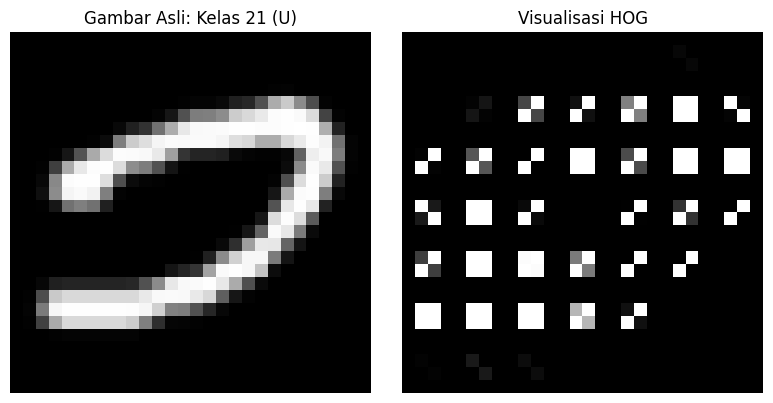

In [61]:
# Tampilkan gambar asli dan hasil HOG  
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title(f"Gambar Asli: Kelas {label_num} ({label_char})")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Visualisasi HOG")
plt.imshow(hog_image_rescaled, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

The HOG results will be included in the next process because the parameter results from HOG give a greater chance of finding the best parameter combination and achieving maximum accuracy.

# 3. Klasifikasi

In [62]:
# Inisialisasi SVM dengan parameter kustom
clf = SVC(
    kernel='rbf',   # 'linear', 'rbf', 'poly', atau 'sigmoid'
    C=10,           # regularisasi (default=1.0). Semakin besar = overfit
    gamma=0.01      # pengaruh jarak (default='scale' atau float)
)

Kernel = Using a Gaussian Radial Basis Function (RBF) kernel which is suitable for non-linear data.

C = Regularization parameter: the larger it is → the tighter the model is on the data (may overfit).

gamma = for Determining the influence of a single data point: small = far-reaching, large = localized focus.

In [63]:
# Latih model
clf.fit(X_train_hog, y_train)

SVC(C=10, gamma=0.01)

In [64]:
# Prediksi
y_pred = clf.predict(X_test_hog)

In [65]:
# Definisikan parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1]  # hanya untuk rbf dan poly
}

In [66]:
# Make a basic model using SVC
svc = SVC()

In [67]:
# Grid search dengan 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,  # paralel semua core CPU
    verbose=1,
    scoring='accuracy'
)

In [68]:
# Jalankan Grid Search pada data latih (fitur HOG)
grid_search.fit(X_train_hog, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [69]:
# Cetak parameter terbaik dan skor validasi tertinggi
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best Cross-validation Accuracy: 0.8447115384615383


# 4. Evaluasi

In [70]:
# Gunakan model terbaik
best_model = grid_search.best_estimator_

# Evaluasi pada data Test
y_pred_best = best_model.predict(X_test_hog)

# Evaluasi pada data Train
y_train_pred = best_model.predict(X_train_hog)

In [71]:
# === EVALUASI DATA TRAIN ===
precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)


print("=== EVALUASI PADA DATA TRAIN (80%) ===")
print(f"Akurasi   : {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Presisi   : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred))

=== EVALUASI PADA DATA TRAIN (80%) ===
Akurasi   : 0.9962
Presisi   : 0.9963
Recall    : 0.9962
F1-score  : 0.9961

Classification Report (Train):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        80
           3       1.00      1.00      1.00        80
           4       1.00      1.00      1.00        80
           5       1.00      1.00      1.00        80
           6       1.00      1.00      1.00        80
           7       1.00      1.00      1.00        80
           8       1.00      1.00      1.00        80
           9       0.92      0.99      0.95        80
          10       1.00      1.00      1.00        80
          11       1.00      1.00      1.00        80
          12       0.99      0.91      0.95        80
          13       1.00      1.00      1.00        80
          14       1.00      1.00      1.00        80
          15       1.00      1.00      1.0

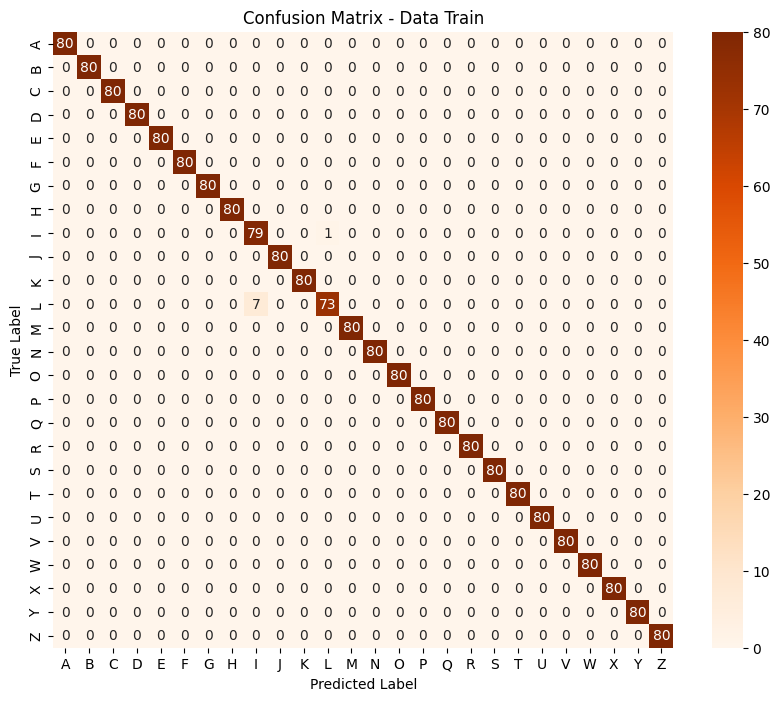

In [72]:
# Confusion matrix untuk data train
cm_train = confusion_matrix(y_train, y_train_pred)

# Buat label huruf A-Z
labels = list(string.ascii_uppercase)  # ['A', 'B', ..., 'Z']

plt.figure(figsize=(10, 8))
sns.heatmap(cm_train, annot=True, cmap="Oranges", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Data Train")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [73]:
# === EVALUASI DATA TEST ===
y_test_pred = best_model.predict(X_test_hog)

#Evaluasi
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)


In [74]:
print("=== EVALUASI PADA DATA TEST (20%) ===")
print(f"Akurasi   : {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Presisi   : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

=== EVALUASI PADA DATA TEST (20%) ===
Akurasi   : 0.7981
Presisi   : 0.8124
Recall    : 0.7981
F1-score  : 0.8009

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.87      0.65      0.74        20
           2       0.83      0.75      0.79        20
           3       0.89      0.80      0.84        20
           4       0.86      0.90      0.88        20
           5       0.85      0.85      0.85        20
           6       0.84      0.80      0.82        20
           7       0.61      0.70      0.65        20
           8       0.75      0.75      0.75        20
           9       0.50      0.50      0.50        20
          10       0.71      0.75      0.73        20
          11       0.89      0.85      0.87        20
          12       0.48      0.70      0.57        20
          13       0.78      0.70      0.74        20
          14       0.84      0.80      0.82        20
          15       0.91      1.00      0.95 

In [75]:
# Confusion matrix untuk data test
cm_test = confusion_matrix(y_test, y_test_pred)

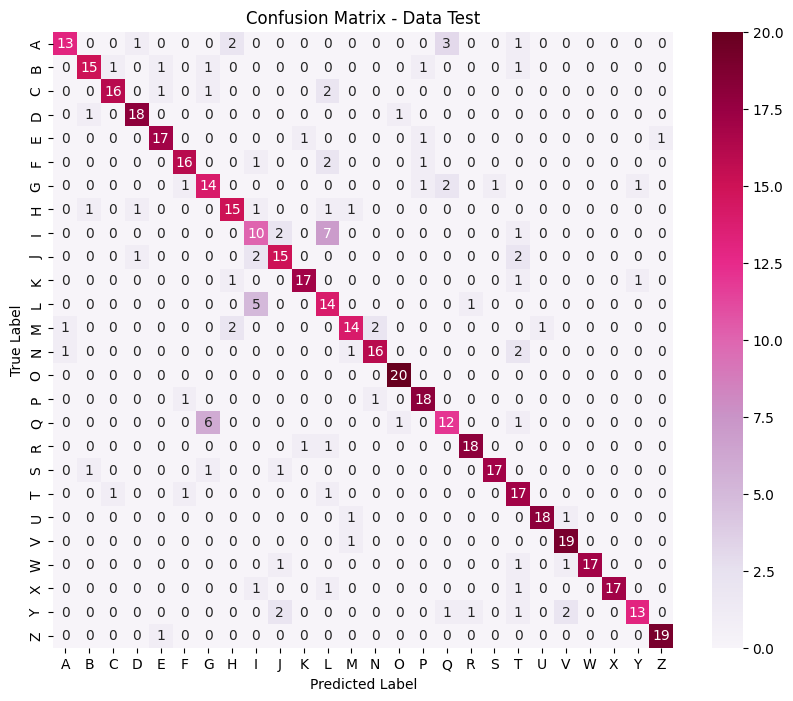

In [76]:
# Buat label huruf A-Z
labels = list(string.ascii_uppercase)  # ['A', 'B', ..., 'Z']

plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, cmap="PuRd", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Data Test")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

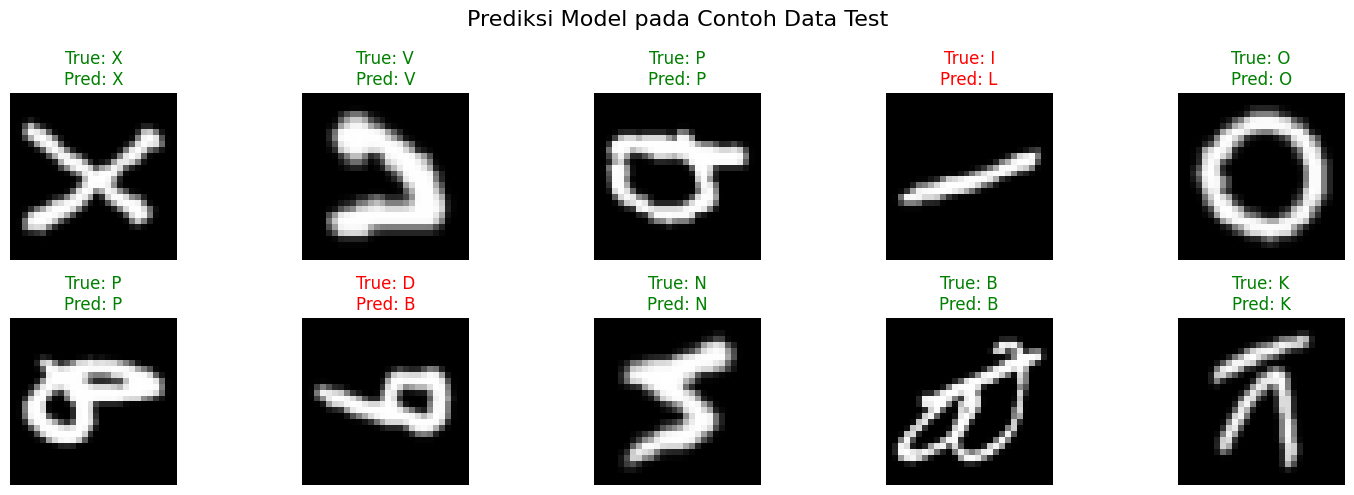

In [77]:
# Ambil beberapa sampel dari data test
n_samples = 10
indices = np.random.choice(len(X_test), n_samples, replace=False)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    image = X_test.iloc[idx].values.reshape((28, 28))
    true_label = chr(y_test.iloc[idx] + 64)         # konversi angka ke huruf (1=A, ..., 26=Z)
    pred_label = chr(y_test_pred[idx] + 64)         # hasil prediksi model

    plt.subplot(2, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}", color="green" if true_label == pred_label else "red")
    plt.axis('off')

plt.suptitle("Prediksi Model pada Contoh Data Test", fontsize=16)
plt.tight_layout()
plt.show()
